In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Deep Learning/Linear NN/Loyers.csv')
print("Number of rows and columns in the dataset: ", dataset.shape)
dataset.head()

Number of rows and columns in the dataset:  (545, 2)


,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


Text(0, 0.5, 'Loyer')

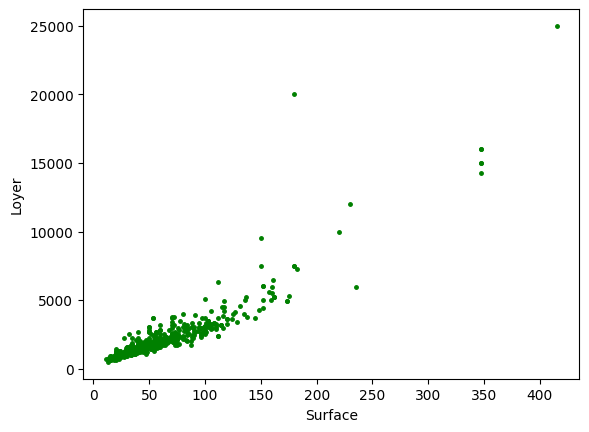

In [15]:
from matplotlib import pyplot as plt
plt.plot(dataset['surface'],  dataset['loyer'], 'g.', markersize=5)
plt.xlabel('Surface')
plt.ylabel('Loyer')


Text(0, 0.5, 'Loyers')

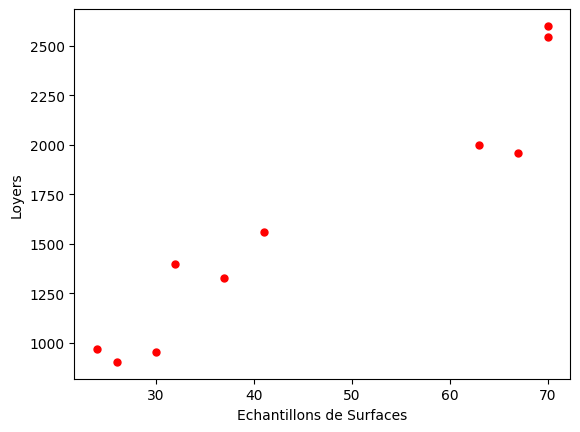

In [19]:
# Visualizing a sample 10 points
x_ex=dataset['surface'][:10]
y_ex=dataset['loyer'][:10]
plt.plot(x_ex,  y_ex, 'ro', markersize=5)
plt.xlabel('Echantillons de Surfaces')
plt.ylabel('Loyers')


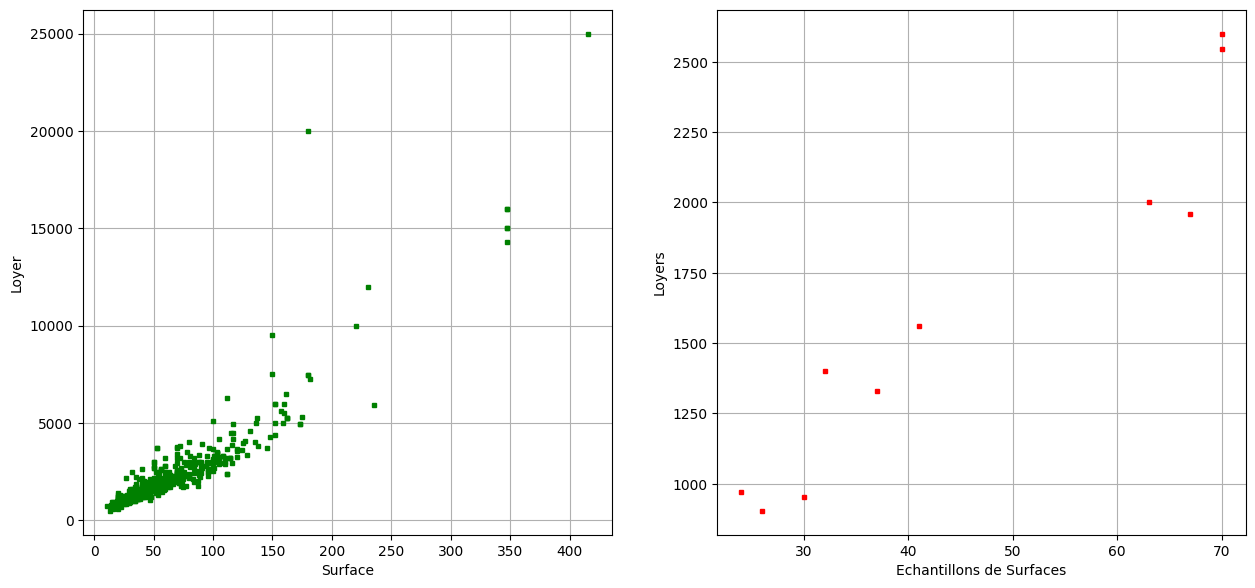

In [21]:
# Both figures
plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.plot(dataset['surface'],  dataset['loyer'], 'gs', markersize=3)
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.grid(True)

plt.subplot(222)
plt.plot(x_ex,  y_ex, 'rs', markersize=3)
plt.xlabel('Echantillons de Surfaces')
plt.ylabel('Loyers')
plt.grid(True)


In [22]:
def straight_line(a, b, x):
    y = a*x + b
    return y

In [23]:
y_predict1=[straight_line(2, 3, x_ex[i]) for i in range(10)]
y_predict2=[straight_line(10, 0, x_ex[i]) for i in range(10)]
y_predict3=[straight_line(10, 1000, x_ex[i]) for i in range(10)]
y_predict4=[straight_line(20, 1500, x_ex[i]) for i in range(10)]


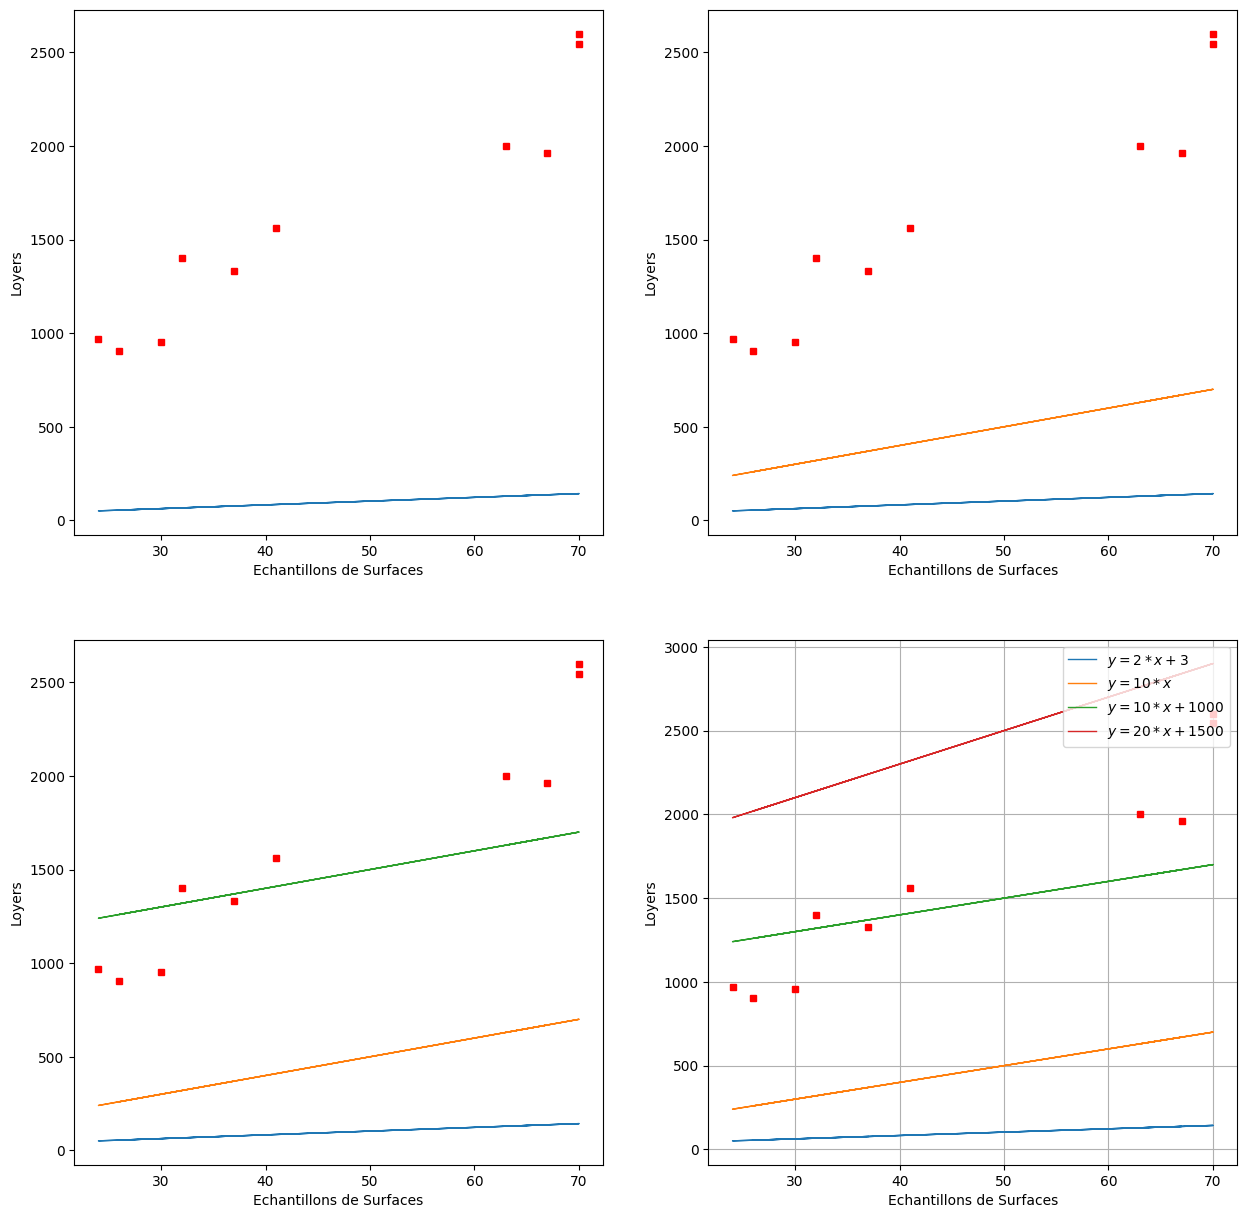

In [26]:
def draw():
    plt.figure(figsize=(15, 15))
    plt.subplot(221)
    plt.plot(x_ex,  y_ex, 'rs', markersize=4)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')
    plt.plot(x_ex, y_predict1, label='$y= 2 * x + 3', linewidth=1.0)

    plt.subplot(222)
    plt.plot(x_ex,  y_ex, 'rs', markersize=4)
    plt.plot(x_ex, y_predict1, label='$y= 2 * x + 3', linewidth=1.0)
    plt.plot(x_ex, y_predict2, label='$y = 10 * x$',linewidth=1.0)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')

    plt.subplot(223)
    plt.plot(x_ex,  y_ex, 'rs', markersize=4)
    plt.plot(x_ex, y_predict1, label='$y= 2 * x + 3 $', linewidth=1.0)
    plt.plot(x_ex, y_predict2, label='$y = 10 * x$',linewidth=1.0)
    plt.plot(x_ex, y_predict3, label='$y= 10 * x + 1000$',linewidth=1.0)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')

    plt.subplot(224)
    plt.plot(x_ex,  y_ex, 'rs', markersize=4)
    plt.plot(x_ex, y_predict1, label='$y= 2 * x + 3 $', linewidth=1.0)
    plt.plot(x_ex, y_predict2, label='$y = 10 * x$',linewidth=1.0)
    plt.plot(x_ex, y_predict3, label='$y= 10 * x + 1000$',linewidth=1.0)
    plt.plot(x_ex, y_predict4, label='$y= 20 * x + 1500$', linewidth=1.0)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')

    plt.grid(True)
    plt.legend(loc='upper right')
    plt.grid(True)

draw()


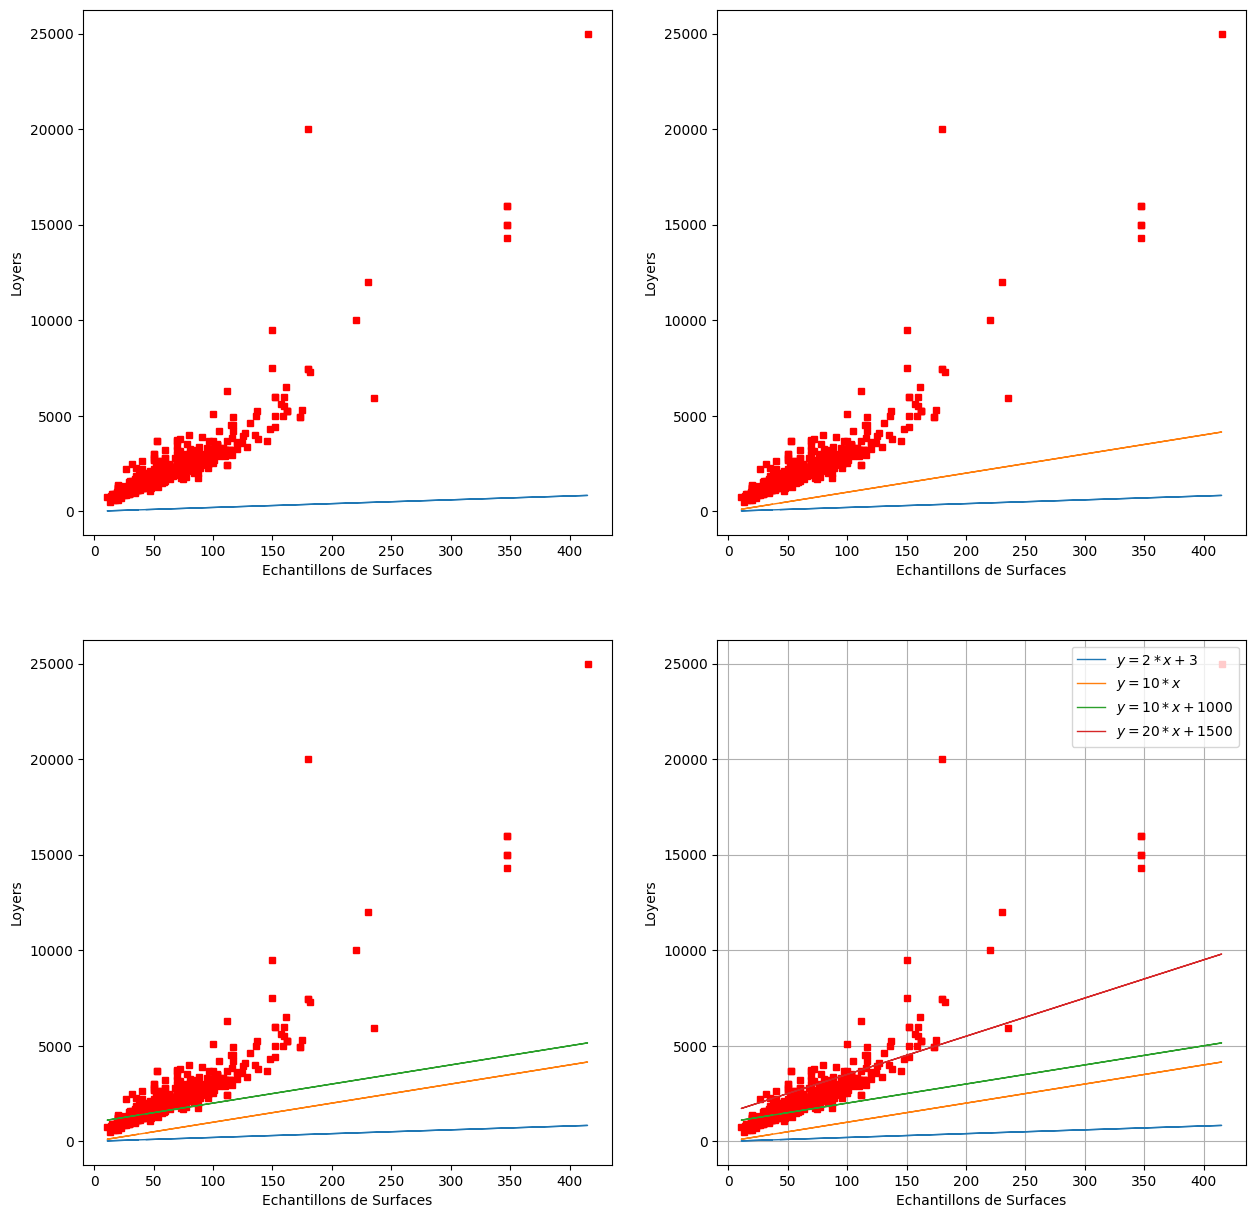

In [29]:
x_ex = dataset['surface'][:]
y_ex = dataset['loyer'][:]

y_predict1 = [ straight_line(2, 3, x_ex[i]) for i in range(len(dataset))]
y_predict2 = [ straight_line(10, 0, x_ex[i]) for i in range(len(dataset))]
y_predict3 = [ straight_line(10, 1000, x_ex[i]) for i in range(len(dataset))]
y_predict4 = [ straight_line(20, 1500, x_ex[i]) for i in range(len(dataset))]


draw()

In [30]:
def cost(y, y_tilde):
    J = .0
    for i in range(len(dataset)):
        J = + (y[i] - y_tilde[i])**2
    J = J/(2*len(dataset))
    return J

In [32]:
print('1st line cost:', cost(y_ex, y_predict1))
print('2nd line cost:', cost(y_ex, y_predict2))
print('3rd line cost:', cost(y_ex, y_predict3))
print('4th line cost:', cost(y_ex, y_predict4))



1st line cost: 2116.8449541284403
2nd line cost: 1255.8715596330276
3rd line cost: 26.513761467889907
4th line cost: 543.9449541284404


# 2nd Part: Optimal Resolution


In [34]:
import numpy as np
X = np.matrix([np.ones(len(dataset)), dataset['surface'].values]).T
y = np.matrix(dataset['loyer']).T

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Optimal θ: ", theta)

Optimal θ:  [[-283.37836117]
 [  40.97116431]]


In [35]:
theta[0]

matrix([[-283.37836117]])

In [39]:
y_predict_optimal = [straight_line(theta[1,0], theta[0,0], x_ex[i]) for i in range(len(dataset))]
print('Optimal cost:', cost(y_ex, y_predict_optimal))

Optimal cost: 7.538442606466304


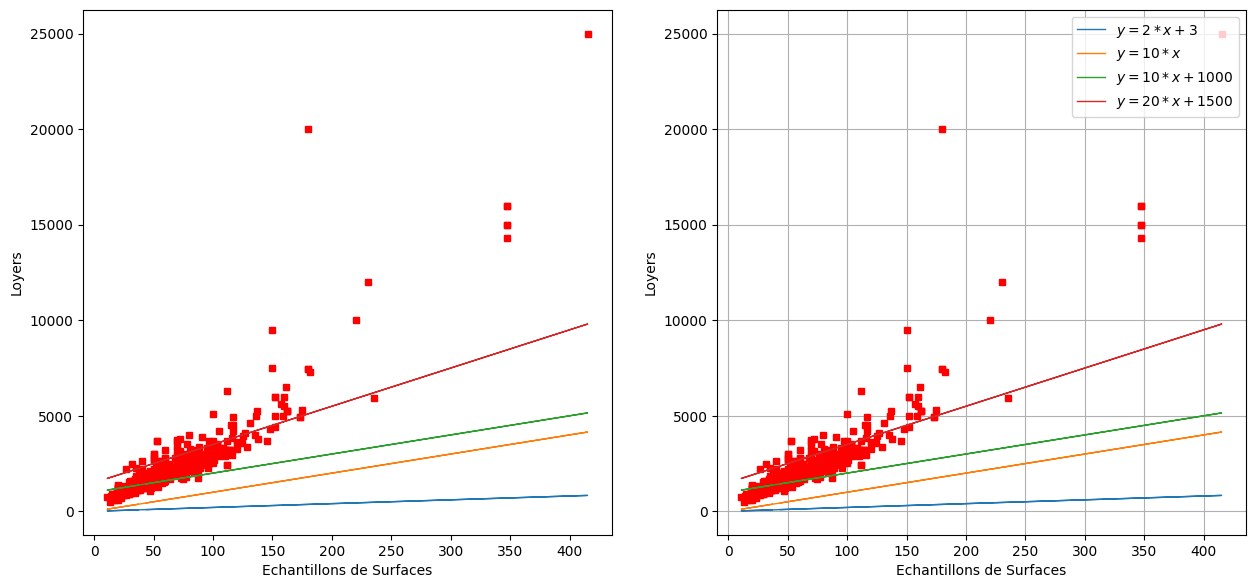

In [42]:
def draw2():
    plt.figure(figsize=(15, 15))

    plt.subplot(221)
    plt.plot(x_ex,  y_ex, 'rs', markersize=4)
    plt.plot(x_ex, y_predict1, label='$y= 2 * x + 3 $', linewidth=1.0)
    plt.plot(x_ex, y_predict2, label='$y = 10 * x$',linewidth=1.0)
    plt.plot(x_ex, y_predict3, label='$y= 10 * x + 1000$',linewidth=1.0)
    plt.plot(x_ex, y_predict4, label='$y= 20 * x + 1500$', linewidth=1.0)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')

    plt.subplot(222)
    plt.plot(x_ex,  y_ex, 'rs', markersize=4)
    plt.plot(x_ex, y_predict1, label='$y= 2 * x + 3$', linewidth=1.0)
    plt.plot(x_ex, y_predict2, label='$y = 10 * x$',linewidth=1.0)
    plt.plot(x_ex, y_predict3, label='$y= 10 * x + 1000$',linewidth=1.0)
    plt.plot(x_ex, y_predict4, label='$y= 20 * x + 1500$', linewidth=1.0)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')

    plt.grid(True)
    plt.legend(loc='upper right')
    plt.grid(True)

draw2()

# Conclusion


The Normal Equation method (θ = (XᵀX)⁻¹Xᵀy) provides the exact mathematical solution for linear regression by solving for the optimal parameters directly.

Key Points:

- Advantages: Exact solution, no iterations needed, simple implementation

- Limitations: Computationally expensive (O(n³)), memory-intensive for many features, potential numerical instability

- Best for: Small datasets and educational purposes

- Avoid for: Large datasets with many features (>10,000)

Practical Verdict:
Mathematically optimal for small problems, but not practical for large-scale applications where iterative methods like gradient descent are preferred. For real-world use, add regularization and stability improvements.